# Project: Wrangling and Analyze Data

In [1]:
# import libraries that will use in the project
import pandas as pd
import numpy as np
import requests
import json
import tweepy
from functools import reduce
from tweepy import OAuthHandler
from timeit import default_timer as timer 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Read twitter archive csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Download programatically the tweet image predictions tsv file using Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
url_response = requests.get(url)
with open ('image_predictions.tsv', 'wb') as file:
    file.write(url_response.content)

In [4]:
# Read tweet image predictions tsv file
image_predictions = pd.read_csv('image_predictions.tsv', sep ='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [15]:
# Open json file line by line
with open('tweet_json.txt') as json_file:
    data = json_file.readlines()
for i in data:
    print(json.loads(i))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'created_at': 'Mon Dec 07 01:47:30 +0000 2015', 'id': 673680198160809984, 'id_str': '673680198160809984', 'full_text': 'This is Shnuggles. I would kill for Shnuggles. 13/10 https://t.co/GwvpQiQ7oQ', 'truncated': False, 'display_text_range': [0, 76], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 673680162584698880, 'id_str': '673680162584698880', 'indices': [53, 76], 'media_url': 'http://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg', 'url': 'https://t.co/GwvpQiQ7oQ', 'display_url': 'pic.twitter.com/GwvpQiQ7oQ', 'expanded_url': 'https://twitter.com/dog_rates/status/673680198160809984/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 768, 'h': 1024, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 673680162584698880, '

In [5]:
# Read tweet json file line by line and determine the column name in the table
df_tweet_json = []
with open('tweet_json.txt') as x:
    for i in x:
        data = json.loads(i)
        df_tweet_json.append({'tweet_id': data['id_str'],
                          'retweet_count': data['retweet_count'],
                          'favorite_count': data['favorite_count']})
tweet_json = pd.DataFrame(df_tweet_json, columns=['tweet_id', 'retweet_count', 'favorite_count'])
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6970,33697
1,892177421306343426,5273,29228
2,891815181378084864,3464,21976
3,891689557279858688,7193,36793
4,891327558926688256,7718,35183


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
# check a sample of twitter_archive dataframe
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1477,693622659251335168,NaN,NaN,2016-01-31 02:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you keepin the popcorn bucket in your lap...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693622659...,10,10,None,None,None,None,None
133,866720684873056260,NaN,NaN,2017-05-22 18:21:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",He was providing for his family 13/10 how dare...,NaN,NaN,NaN,https://twitter.com/nbcnews/status/86645871888...,13,10,None,None,None,None,None
453,818588835076603904,NaN,NaN,2017-01-09 22:42:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Chelsea. She forgot how...,7.735476e+17,4.196984e+09,2016-09-07 15:44:53 +0000,https://twitter.com/dog_rates/status/773547596...,11,10,Chelsea,None,None,pupper,None
128,867774946302451713,NaN,NaN,2017-05-25 16:10:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Harold. He's h*ckin cooperative. 13/10 g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867774946...,13,10,Harold,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
451,818627210458333184,NaN,NaN,2017-01-10 01:15:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wafer. He represents every fiber of my be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818627210...,13,10,Wafer,None,None,None,None
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
764,777953400541634568,NaN,NaN,2016-09-19 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Gerald. He's a fairly exot...,7.681934e+17,4.196984e+09,2016-08-23 21:09:14 +0000,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None
275,840696689258311684,NaN,NaN,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840696689...,10,10,None,None,None,None,None
2196,668852170888998912,NaN,NaN,2015-11-23 18:02:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobb. Bobb is a Golden High Fescu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668852170...,11,10,Bobb,None,None,None,None


#### Visual assessment for twitter archive:

- I need to remove the reply and retweet.

- Timestamp include invalue +0000.

- Source is not readable. 

- There are 4 columns (doggo, floofer, pupper, puppo) that include None values, I will check it with programmatically.

- Some of the columns include NaN values like retweet_status(id,user_id,...etc) and also in_reply(id,user_id), I will check it with programmatically.

In [7]:
# Check twitter archive info 
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

timestamp is object dtype not as datetime dtype.

There are null values in (in_reply..etc and retweeted...etc, and expanded_urls)

In [8]:
#looking for null values in twitter archive dataframe
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
# Looking for dupilcated values in twitter archive dataframe
twitter_archive.duplicated().sum()

0

In [10]:
# Take a look into twitter archive name column 
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Penny            10
Lola             10
Tucker           10
Bo                9
Winston           9
the               8
Sadie             8
Bailey            7
Daisy             7
Buddy             7
an                7
Toby              7
Jax               6
Jack              6
Milo              6
Rusty             6
Oscar             6
Leo               6
Bella             6
Dave              6
Koda              6
Scout             6
Stanley           6
Chester           5
               ... 
Crimson           1
Leonidas          1
Darrel            1
Zeek              1
Cleopatricia      1
Amber             1
Thor              1
Tonks             1
Kayla             1
Jebberson         1
Trip              1
Boston            1
Sunshine          1
Ralpher           1
Pluto             1
Corey             1
Brandi            1
Vixen             1
Laela             1


There are some names not valid like (a,the, an, ...etc).

In [8]:
twitter_archive[twitter_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
getting          2
actually         2
mad              2
not              2
officially       1
space            1
this             1
by               1
all              1
his              1
such             1
old              1
incredibly       1
infuriating      1
light            1
my               1
unacceptable     1
life             1
Name: name, dtype: int64

In [11]:
# Take a look into twitter archive name column 
twitter_archive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

lowercase letters and uppercase letters in the names column.

In [12]:
# Check the describe twitter archive (mean, min, Q1,...etc)
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


numerator rating includes outliers (26) values like ( max = 1776, ...etc).

In [13]:
# Check how many rating numerator > 15
twitter_archive.query('rating_numerator > 15').count()[0]

26

In [14]:
# Check how many rating denominator != 10
twitter_archive.query('rating_denominator != 10').count()[0]

23

denominator include outliers (23) values like ( max equal more than 10 and min less than 10) because denominator should be equal 10.

In [15]:
# Display full text column to check if there are any correction information about rating
rating = twitter_archive[['tweet_id','text','rating_numerator','rating_denominator']]
numerator_fixing = rating.query('rating_numerator > 15')

#display full text use set_option function
pd.set_option('display.max_colwidth', -1)
numerator_fixing

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [16]:
# Display full text column in denominator as well.
denominator_fixing = rating.query('rating_denominator !=10')
denominator_fixing

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


I found some correction ratings in the text for numerator and denominator, and I can correct them.

In [17]:
# Take a look into Source column
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

There are 4 sources, I can fix it to readable so easily.

####  Programmatically assessement for twitter archive:

- timestamp is object dtype not as datetime dtype.

- There are null values in (in_reply..etc and retweeted...etc, and expanded_urls).

- There are some names not valid like (a,the, an, ...etc).

- lowercase letters and uppercase letters in the names column.

- numerator rating includes outliers (26) values like ( max = 1776, ...etc).

- denominator include outliers (23) values like ( max equal more than 10 and min less than 10) because denominator should be equal 10.

- I found some correction ratings in the text for numerator and denominator, and I can correct them.

- Drop invalid rating to avoid outliers values in the visualization.

- There are 4 sources, I can fix it to readable so easily.


In [14]:
# Take a look into image predictions sample
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1875,845677943972139009,https://pbs.twimg.com/media/C7xzmngWkAAAp9C.jpg,1,chow,0.808681,True,groenendael,0.123141,True,Newfoundland,0.022143,True
1157,733482008106668032,https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg,1,French_bulldog,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False
27,666396247373291520,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg,1,Chihuahua,0.978108,True,toy_terrier,0.009397,True,papillon,0.004577,True
1851,840370681858686976,https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg,1,teapot,0.981819,False,cup,0.014026,False,coffeepot,0.002421,False
326,671891728106971137,https://pbs.twimg.com/media/CVMJ9guXAAAhAiK.jpg,1,Labrador_retriever,0.567933,True,golden_retriever,0.349401,True,seat_belt,0.069396,False
614,680161097740095489,https://pbs.twimg.com/media/CXBq6RPWkAAaNuU.jpg,1,bluetick,0.268681,True,miniature_pinscher,0.125652,True,English_setter,0.089373,True
1541,791026214425268224,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
493,675707330206547968,https://pbs.twimg.com/media/CWCYOqWUAAARmGr.jpg,1,bath_towel,0.721933,False,Staffordshire_bullterrier,0.059344,True,bagel,0.035702,False
232,670417414769758208,https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg,1,sea_urchin,0.493257,False,porcupine,0.460565,False,cardoon,0.008146,False
1050,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True


#### Visual assessment for image predictions:

- The dog types are divided into 3 columns and confident as well.

- Some of the dog type names include uppercase letters and lowercase letters issue, and include the tag '_'. 

- There is a columns (p1_dog, p2_dog,p3_dog) verify if this image for dog or not, I should keep dog images only to make sense.

In [19]:
# Check image predictions info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- image_predictions contains 2075 rows, but twitter_archive contains 2356 rows, there is a 281 rows difference.

In [20]:
# Check if there any tweet id duplicated
image_predictions.tweet_id.duplicated().sum()

0

In [21]:
# Take a look on jpg_url for duplicate images
image_predictions.jpg_url.duplicated().sum()

66

- There are (66) url images duplicated.

#### Programmatically assessment for image predictions:

- There are (66) url images duplicated.

- There are many unnecessary columns I can drop them.

- image_predictions contains 2075 rows, but twitter_archive contains 2356 rows, there is a 281 rows difference.

In [22]:
# Check a tail of tweet json 
tweet_json.tail(20)

,tweet_id,retweet_count,favorite_count
2307,666273097616637952,66,151
2308,666268910803644416,38,99
2309,666104133288665088,5454,12844
2310,666102155909144576,11,66
2311,666099513787052032,53,134
2312,666094000022159362,63,142
2313,666082916733198337,37,92
2314,666073100786774016,130,273
2315,666071193221509120,51,127
2316,666063827256086533,180,396


In [23]:
# Display tweet json info
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


- tweet_json contains 2327 rows, twitter_archive 2356 rows, image_predictions 2078 rows, I need to equal between them by tweet_id

- tweet_id data type is object not int.

In [24]:
# Check duplicate tweet id
tweet_json.tweet_id.duplicated().sum()

0

In [25]:
# Check null Values 
tweet_json.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

#### Programmatically assessement for tweet json:

- tweet_id data type is object not int.

- tweet_json contains 2327 rows, twitter_archive 2356 rows, image_predictions 2078 rows, I need to equal between them by tweet_id.

### Quality issues
1. Delete (181) retweets and (78) replies values. 

2. Change timeestamp dtype to be datetime.

3. Correct invalide names in 'name' column like('a', 'th', 'an',...) and fix the format to uppercase letter.

4. Ratings of numerator and denominator containts outliers values.

5. Clean 'source' column to be readable easily.

6. Drop duplicated image in jpg_url column.

7. Change tweet_id dtype to be int.

8. Drop unnecessary columns (in_reply,..,retweet_status, ..., expanded, text,..).

9. Marge columns p1,p2,p3 to one column and p1_conf,.. to be one column as well.

10. Remove the tags '_' form dogs type and fix the format to uppercase letter.

### Tidiness issues
1. Marge the dog stage from 4 columns (doggo, floofer, pupper, puppo) to be one column.

2. Marge the 3 dataframes to be one dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [6]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: Delete retweet and replies values and columns.

#### Define: I use isnull() function to remove any retweets & replies values in the rows .

#### Code

In [7]:
# Remove retweets rows
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

In [8]:
# remove replies rows
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [9]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Issue #2: Change timestamp dtype to be datetime type.

#### Define: Convert timestamp dtype to be datetime type using to_datetime() function. 

#### Code

In [9]:
# Convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [11]:
twitter_archive_clean.timestamp.sample(5)

1468   2016-02-01 17:11:59
1967   2015-12-06 03:24:51
439    2017-01-13 17:00:21
515    2016-12-21 01:44:13
153    2017-05-11 00:01:27
Name: timestamp, dtype: datetime64[ns]

### Issue #3: Correct invalide names in 'name' column like ('a', 'an', 'the'.....) and fix the format to uppercase.

#### Define: Use replace() function to change incorrect name to None and using str.capitalize() to change the name format to uppercase letter.

#### Code

In [10]:
# Replace incorrect names
twitter_archive_clean.name = twitter_archive_clean.name.replace({'a':'None', 'an':'None', 'the':'None',
                                                                 'this':'None','very':'None','one':'None','unacceptable':'None','such':'None',
                                                                'space':'None','quite':'None','old':'None','officially':'None','not':'None',
                                                                'my':'None','just':'None','his':'None','infuriating':'None','incredibly':'None',
                                                                'all':'None','actually':'None','getting':'None','by':'None','life':'None',
                                                                 'mad':'None','light':'None'})

#### Test

In [11]:
# Check any lowercase letter in the names
name = twitter_archive_clean.name.str.contains('^[a-z]',regex=True)
twitter_archive_clean[name].name.value_counts().sort_index()

Series([], Name: name, dtype: int64)

In [12]:
# Print a head of name
twitter_archive_clean.name.head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

### Issue #4: Ratings of numerator and denominator columns contain outliers values.

#### Define: Correct the ratings values in both numerator and denominator if I found the correct rating in the text using loc[] function, otherwise drop the outliers values.

#### Code

In [13]:
# Change the rating values after checked the text before
# Found 8 valid rating in the text tweet_id (786709082849828864,77802703422012620,716439118184652801,680494726643068929,740373189193256964,740373189193256964,682962037429899265,666287406224695296)
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 7867090828498288694, 'rating_numerator'] = 9.75
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 7867090828498288694, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 778027034220126208, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 680494726643068929, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10

In [14]:
# Drop outliers ratings values rows
twitter_archive_clean = twitter_archive_clean.drop([433,516,902,979,1120,1228,1254,1274,1351,1433,1635,1779,1843,2074])

#### Test

In [16]:
twitter_archive_clean.rating_numerator.value_counts()

12.00    486
10.00    437
11.00    414
13.00    288
9.00     153
8.00      98
7.00      51
14.00     39
5.00      34
6.00      32
3.00      19
4.00      15
2.00       9
1.00       4
0.00       1
11.27      1
11.26      1
75.00      1
Name: rating_numerator, dtype: int64

In [17]:
twitter_archive_clean.rating_denominator.value_counts()

10    2083
Name: rating_denominator, dtype: int64

### Issue #5: Clean source column to be readable easily.

#### Define: There are 4 sources be Use replace() function I can change the url to just the name of the source.

#### Code

In [15]:
# Change the url to be just one of this sources (Twitter for iphone, Vine - Make a Scene, Twitter Web Client, TweetDeck).
twitter_archive_clean.source = twitter_archive_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
                                                             '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                                             '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
                                                             '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'})

#### Test

In [28]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1951
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

### Issue #6: Drop dublicated iamges in jpg_url column.

#### Define: Remove the 66 of duplicated image using drop() function.

#### Code

In [16]:
# Drop the duplicated values
image_predictions_clean.drop_duplicates(['jpg_url'],'last', True)

#### Test

In [16]:
image_predictions_clean.jpg_url.duplicated().sum()

0

### Issue #7: Change tweet id dtype to int.

#### Define: change tweet id dtype to be int to can join this taple by tweet id.

#### Code

In [17]:
# Change dtype for tweet id
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)

#### Test

In [25]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


### Issue #8: Drop unnecessary columns.

#### Define: Remove columns that no needed from twwet archvie and image predictions.

#### Code

In [18]:
# Drop all columns that no more needed
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id',
                                                    'retweeted_status_timestamp',
                                                    'expanded_urls','text'],axis=1)

image_predictions_clean = image_predictions_clean.drop(['img_num'],axis=1)
                                                    

#### Test

In [27]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,12.0,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,13.0,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,12.0,10,Franklin,None,None,None,None


In [28]:
image_predictions_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #9: Marge columns p1,p2,p3 to one column dog_type and (p1_conf,...) to be one column conf_level as well.

#### Define: Create a function using (if, elif) to look through p1,p2,p3 and p1_conf, p2_conf, p3_conf to find and append all of them to one column for each them using append().

#### Code

In [19]:
# Create a function for a dog type and conf level to looking into the columns
dog_type = []
conf_level = []


def i(image_predictions_clean):
    if image_predictions_clean.p1_dog == True:
        dog_type.append(image_predictions_clean.p1)
        conf_level.append(image_predictions_clean.p1_conf)
    elif image_predictions_clean.p2_dog == True:
        dog_type.append(image_predictions_clean.p2)
        conf_level.append(image_predictions_clean.p2_conf)
    elif image_predictions_clean.p3_dog == True:
        dog_type.append(image_predictions_clean.p3)
        conf_level.append(image_predictions_clean.p3_conf)
    else:
        dog_type.append('unknown')
        conf_level.append(0)
        
# Apply the function by column
image_predictions_clean.apply(i, axis=1)

# Add the dog type and conf level columns to image predictions clean
image_predictions_clean['dog_type'] = dog_type
image_predictions_clean['conf_level'] = conf_level

# Drop columns no longer needed
image_predictions_clean = image_predictions_clean.drop(['p1','p1_conf', 'p1_dog',
                                                        'p2','p2_conf','p2_dog',
                                                       'p3','p3_conf','p3_dog'], axis=1)

#### Test

In [54]:
image_predictions_clean.head()

,tweet_id,jpg_url,dog_type,conf_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature pinscher,0.560311


### Issue #10: Remove the tags '_' from dog type.

#### Difine: Using str.capitalize() and str.replace() to fix the format and remove '_'.

#### Code

In [20]:
# Change the first letter to uppercase
image_predictions_clean.dog_type = image_predictions_clean.dog_type.str.capitalize()
# Remopve '_' from dog type
image_predictions_clean.dog_type = image_predictions_clean.dog_type.str.replace('_', ' ')

#### Test

In [34]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,dog_type,conf_level
237,670433248821026816,https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg,Giant schnauzer,0.062215
1871,844973813909606400,https://pbs.twimg.com/media/C7nzMwTV4AARz4t.jpg,Labrador retriever,0.742421
1898,850753642995093505,https://pbs.twimg.com/media/C8576jrW0AEYWFy.jpg,Pug,0.996952
1309,754011816964026368,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,French bulldog,0.600985
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,Golden retriever,0.841001
1249,747844099428986880,https://pbs.twimg.com/media/CmDgPTsWEAIi2T1.jpg,Pembroke,0.360428
1444,775733305207554048,https://pbs.twimg.com/media/CsP1UvaW8AExVSA.jpg,Unknown,0.000000
1587,798209839306514432,https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg,Pekinese,0.524583
1038,712065007010385924,https://pbs.twimg.com/media/CeHDV73W0AM5Cf8.jpg,Unknown,0.000000
1453,776819012571455488,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,Chihuahua,0.346545


### Tidiness issues

### Issue #1: Merge the dog stage (doggo,floofer,pupper,puppo) in one column only.

#### Define: Create new column under name dog stage and drop the 4 columns for (doggo,floofer,pupper,puppo).

#### Code

In [34]:
# Create one column under dog stage to append 4 columns values
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo','floofer','pupper','puppo',]].max(axis=1)

# Drop the 4 columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### Test

In [36]:
twitter_archive_clean.dog_stage.value_counts()

           1747
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

### Issue #2: Marge the 3 dataframe to be on dataset.

#### Define: marge all table to be in one dataset using merge() function to join all together under name twitter_archive_master.

#### Code

In [27]:
# Join the 3 tables on one dataset by tweet_id
all_data = [twitter_archive_clean,image_predictions_clean,tweet_json_clean]
twitter_archive_master = reduce(lambda left,right:pd.merge(left,right,on=['tweet_id'], how='outer'),all_data)

In [28]:
# Remove any null rows values in the dataset
twitter_archive_master = twitter_archive_master.dropna(how='any',axis=0)

In [29]:
# Change dtype for retweet_count and favorite_count to int dtype
twitter_archive_master['retweet_count'] = twitter_archive_master['retweet_count'].astype(int)
twitter_archive_master['favorite_count'] = twitter_archive_master['favorite_count'].astype(int)

#### Test

In [28]:
twitter_archive_master.head(20)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,conf_level,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13.0,10.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000,6970,33697
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,5273,29228
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,12.0,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,3464,21976
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,13.0,10.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador retriever,0.168086,7193,36793
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,12.0,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,7718,35183
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,13.0,10.0,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake bay retriever,0.425595,2586,17752
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,13.0,10.0,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,1647,10335
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,13.0,10.0,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,15684,56675
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,13.0,10.0,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish terrier,0.487574,3604,24431
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,6070,27851


In [30]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1884 entries, 0 to 2082
Data columns (total 12 columns):
tweet_id              1884 non-null int64
timestamp             1884 non-null datetime64[ns]
source                1884 non-null object
rating_numerator      1884 non-null float64
rating_denominator    1884 non-null float64
name                  1884 non-null object
dog_stage             1884 non-null object
jpg_url               1884 non-null object
dog_type              1884 non-null object
conf_level            1884 non-null float64
retweet_count         1884 non-null int64
favorite_count        1884 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 191.3+ KB


In [31]:
# Check null values
twitter_archive_master.isnull().sum()

tweet_id              0
timestamp             0
source                0
rating_numerator      0
rating_denominator    0
name                  0
dog_stage             0
jpg_url               0
dog_type              0
conf_level            0
retweet_count         0
favorite_count        0
dtype: int64

In [31]:
twitter_archive_master.duplicated().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [32]:
# Store the final dataset under name 'twitter_archive_master'
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [33]:
# Disply info of twitter_archive_master csv
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1884 entries, 0 to 2082
Data columns (total 12 columns):
tweet_id              1884 non-null int64
timestamp             1884 non-null datetime64[ns]
source                1884 non-null object
rating_numerator      1884 non-null float64
rating_denominator    1884 non-null float64
name                  1884 non-null object
dog_stage             1884 non-null object
jpg_url               1884 non-null object
dog_type              1884 non-null object
conf_level            1884 non-null float64
retweet_count         1884 non-null int64
favorite_count        1884 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 191.3+ KB


### Insights:
1. What is the highest source using?

2. What is most popular dog type?

3. Which is the commen dog stage?

4. Whar is the relation between retweets and favorites?

### 1. What is the highest source using?

In [34]:
# Check the count of each source
twitter_archive_master.source.value_counts()

Twitter for iPhone    1849
Twitter Web Client      26
TweetDeck                9
Name: source, dtype: int64

In [35]:
# Display the percentage each source 
twitter_archive_master.source.value_counts(True)*100

Twitter for iPhone    98.142251
Twitter Web Client     1.380042
TweetDeck              0.477707
Name: source, dtype: float64

#### Tweet by Iphone is the highest source by 98.14% 

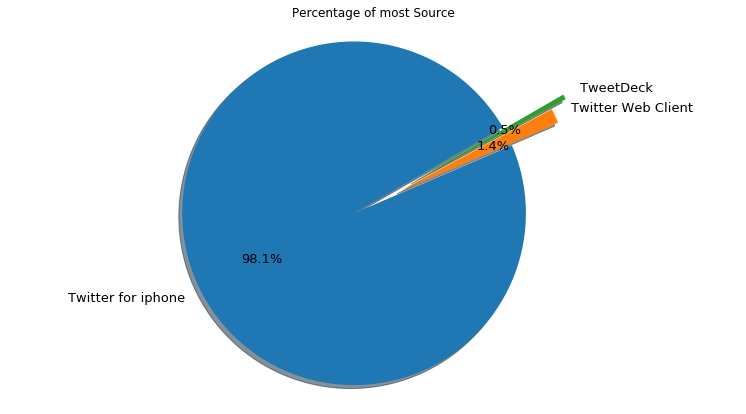

In [164]:
# Display 
df_source = twitter_archive_master.source.value_counts()
labels = ['Twitter for iphone','Twitter Web Client','TweetDeck']
explode = [0.1,0.2,0.3]
plt.pie(df_source,radius=1,labels=labels,explode=explode,startangle=30,autopct='%0.1f%%',shadow=True,textprops={'fontsize':13})
plt.title('Percentage of most Source')
plt.axis('equal');

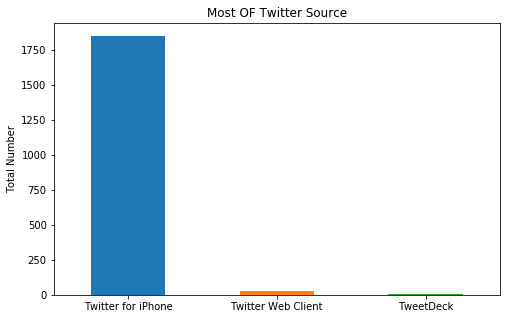

In [75]:
df_source.plot('bar',figsize=(8,5),title='Most OF Twitter Source')
plt.ylabel('Total Number')
plt.xticks(rotation=0);

### 2. What is the most popular dog type?

In [36]:
# display the count of commend dog type without unknown type
twitter_archive_master.dog_type.value_counts()[1:6]

Golden retriever      139
Labrador retriever     95
Pembroke               93
Chihuahua              86
Pug                    60
Name: dog_type, dtype: int64

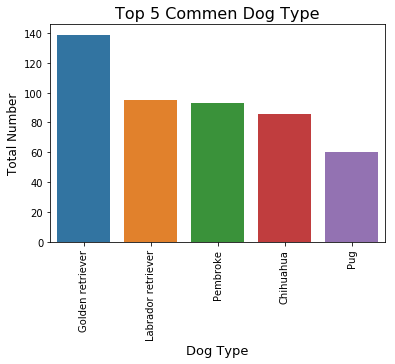

In [37]:
# Display bar chart for each dog type without unknown type
d_type = twitter_archive_master.dog_type.value_counts()[1:6].index
sns.countplot(data=twitter_archive_master,x='dog_type',order=d_type)
plt.xlabel('Dog Type',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('Total Number',fontsize=12)
plt.title('Top 5 Commen Dog Type',fontsize=16);

#### As we see the top of dog type is 'Golden retiever'.

### 3. Which is the commen dog stage?

In [38]:
# Display the count of each stage 
twitter_archive_master.dog_stage.value_counts()

           1592
pupper      203
doggo        59
puppo        22
floofer       8
Name: dog_stage, dtype: int64

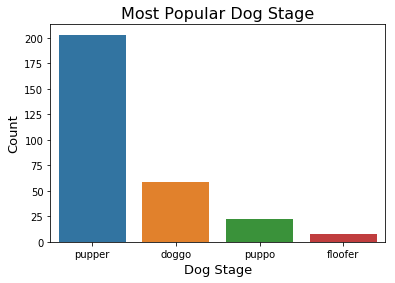

In [39]:
# Display bar chart for each dog stage without the None count
stage = twitter_archive_master.dog_stage.value_counts()[1: ].index
sns.countplot(data=twitter_archive_master, x='dog_stage',order=stage)
plt.xlabel('Dog Stage',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Most Popular Dog Stage', fontsize=16);

#### As we see the pupper stage is the popular dog stage

### 4. What is the relation between retweets and favorite?

Display Line chart to explain the trend of retweets and favorites by time

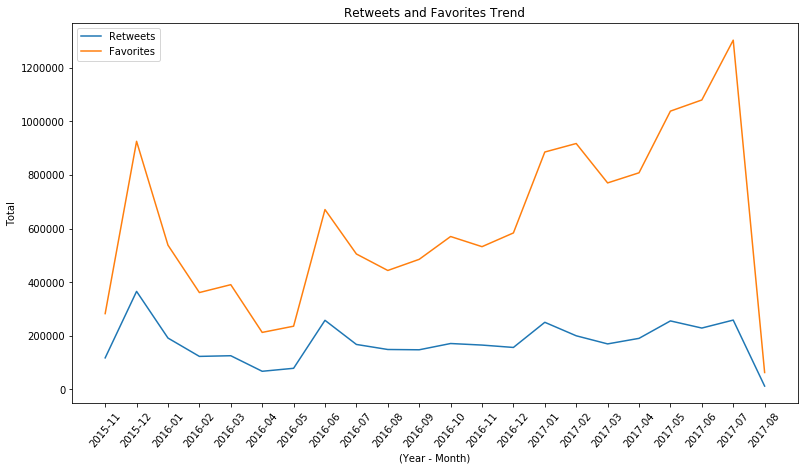

In [162]:
# groupby the year and month datetime for each retweet and favorites
retweets = twitter_archive_master.retweet_count.groupby([twitter_archive_master.timestamp.dt.year,
                                           twitter_archive_master.timestamp.dt.month]).sum()
favorites = twitter_archive_master.favorite_count.groupby([twitter_archive_master.timestamp.dt.year,
                                            twitter_archive_master.timestamp.dt.month]).sum()
# create line time series to display it on the chart
i = twitter_archive_master.timestamp.apply(lambda x: x.strftime("%Y-%m")).value_counts().sort_index().index
plt.plot(i,retweets)
plt.plot(i,favorites)
plt.rcParams["figure.figsize"]=(13,7)
plt.title('Retweets and Favorites Trend')
plt.xlabel('(Year - Month)')
plt.ylabel('Total')
plt.xticks(s,rotation=50)
plt.legend(('Retweets', 'Favorites'));

As we see the highest favorites time happened on '2017-07' and for retweets on '2015-12'